# Logistic regression

Adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

Used as part of Deep Learning, Gilles Louppe, 2018.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Hyper-parameters

In [2]:
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Data

In [3]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
data_iter = iter(train_loader)
X, y = data_iter.next()

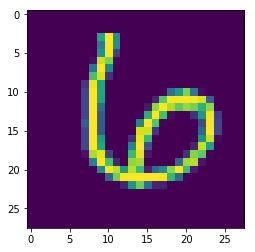

In [6]:
plt.imshow(X[2, 0])

# Model

In [9]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

In [11]:
model(Variable(X.view(-1, 28*28)))

Variable containing:
-0.4460  0.0141  0.0909  ...   0.0808 -0.0439  0.2126
-0.3079  0.0216  0.3513  ...   0.0560 -0.2041  0.0670
-0.1486  0.0020  0.2362  ...  -0.1650 -0.4598 -0.1179
          ...             ⋱             ...          
-0.2045 -0.0096  0.1602  ...  -0.2503 -0.2923  0.3095
-0.2357 -0.0075 -0.0587  ...  -0.0564 -0.1246  0.3168
 0.3288  0.1113  0.0012  ...   0.0592 -0.0484  0.1691
[torch.FloatTensor of size 100x10]

# Loss and optimizer

In [12]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                  % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 2.2039
Epoch: [1/5], Step: [200/600], Loss: 2.0976
Epoch: [1/5], Step: [300/600], Loss: 2.0135
Epoch: [1/5], Step: [400/600], Loss: 1.9435
Epoch: [1/5], Step: [500/600], Loss: 1.8512
Epoch: [1/5], Step: [600/600], Loss: 1.7444
Epoch: [2/5], Step: [100/600], Loss: 1.7006
Epoch: [2/5], Step: [200/600], Loss: 1.6798
Epoch: [2/5], Step: [300/600], Loss: 1.6229
Epoch: [2/5], Step: [400/600], Loss: 1.5971
Epoch: [2/5], Step: [500/600], Loss: 1.4596
Epoch: [2/5], Step: [600/600], Loss: 1.5359
Epoch: [3/5], Step: [100/600], Loss: 1.4093
Epoch: [3/5], Step: [200/600], Loss: 1.3769
Epoch: [3/5], Step: [300/600], Loss: 1.4319
Epoch: [3/5], Step: [400/600], Loss: 1.3070
Epoch: [3/5], Step: [500/600], Loss: 1.2769
Epoch: [3/5], Step: [600/600], Loss: 1.2769
Epoch: [4/5], Step: [100/600], Loss: 1.2161
Epoch: [4/5], Step: [200/600], Loss: 1.0847
Epoch: [4/5], Step: [300/600], Loss: 1.1381
Epoch: [4/5], Step: [400/600], Loss: 1.2160
Epoch: [4/5], Step: [500/600], L

# Test the model

In [13]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the model on the 10000 test images: 82 %
